In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

[Problem 1] Visualization of data

In [2]:
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
points, elevation = fuji[:, 0], fuji[:, 3]
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


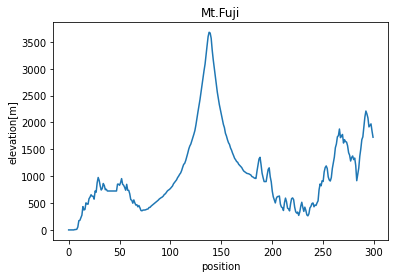

In [3]:
plt.title("Mt.Fuji")
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(points, elevation)
plt.show()

[Problem 2] Create a function to calculate the slope of a point

In [4]:
def compute_gradient(point):
    """
    Calculate the gradient using the amount of change.
    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().
    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    # array_x = nppoints, 
    array_x = np.array(points)
    array_y = np.array(elevation)
    gradient = (array_y[1:] - array_y[:-1]) / (array_x[1:] - array_x[:-1])
    return gradient[point]

[Problem 3] Create a function to calculate the destination

In [5]:
def compute_destination(current_point, alpha):
    """
    Calculate destination point from current point
    Parameters
    ----------------
    current_points: int
    alpha: hyperparameter
    Returns
    ----------------
    Destination points
    """
    try:
        des = current_point - alpha * compute_gradient(current_point)
        des = math.ceil(des)
        if des < 0: 
            raise Exception("Ending...")
        else: 
            return des
    except Exception:
        print("Destination is negative")
        raise

[Problem 4] Creating a function to go down the mountain

In [6]:
def go_down(init_point, alpha):
    """
    Calculte list of points to go down the mountain
    Parameters
    ----------------
    init_point: int
        the initial position to go down the mountain
    Returns
    ----------------
    List of points
    """
    des_points = list()
    des = compute_destination(init_point, alpha)
    i = 1
    while i < 100:
        des_points.append(des)
        tmp = compute_destination(des, alpha)
        if tmp == des: break
        else: des = tmp
        i += 1
    return des_points

des_points = go_down(136, 0.2)

[Problem 5] Visualization of the descent process

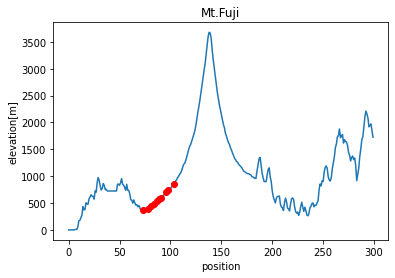

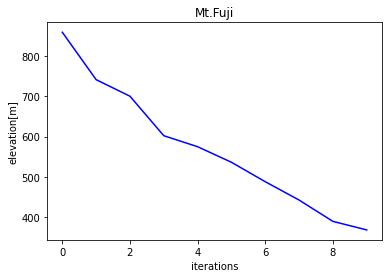

In [7]:
def drawGraph(des_points):
    plt.title("Mt.Fuji")
    plt.xlabel("position")
    plt.ylabel("elevation[m]")
    plt.plot(points, elevation)
    plt.plot(des_points, elevation[des_points], 'ro')
    plt.show()
    
    plt.title("Mt.Fuji")
    plt.xlabel("iterations")
    plt.ylabel("elevation[m]")
    plt.plot(np.arange(0, len(des_points)), elevation[des_points], 'b-')
    plt.show()
drawGraph(des_points)

[Problem 6] Change of initial value

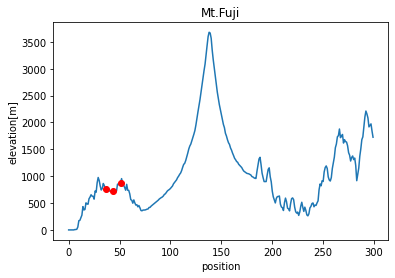

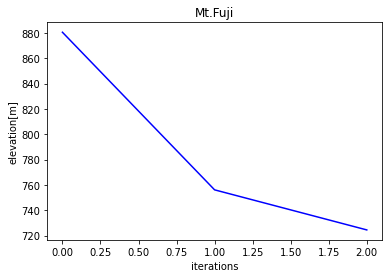

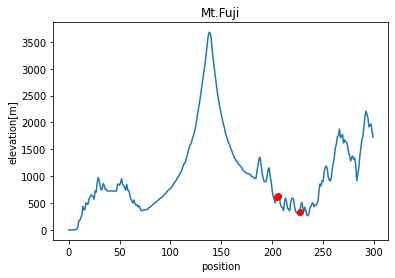

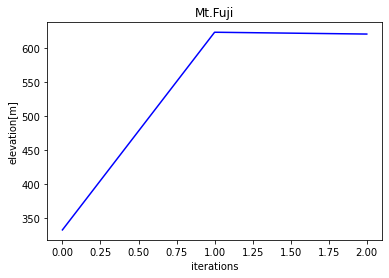

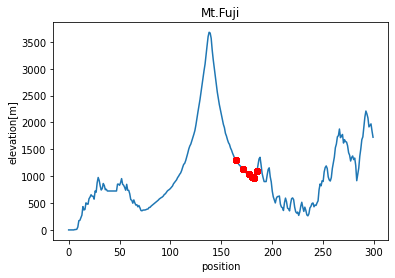

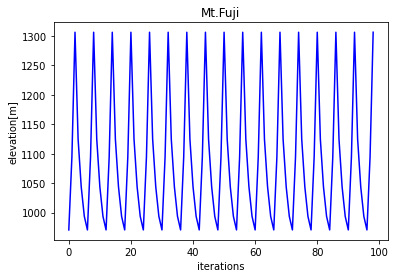

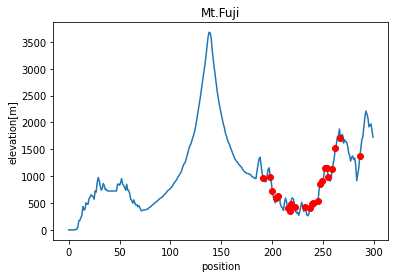

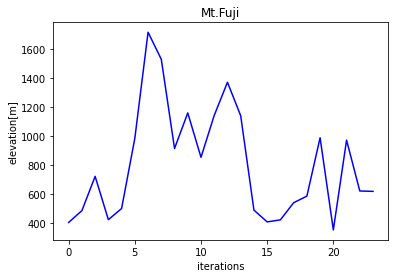

In [8]:
des_points = go_down(30, 0.2)
drawGraph(des_points)

des_points = go_down(220, 0.2)
drawGraph(des_points)

des_points = go_down(180, 0.2)
drawGraph(des_points)

des_points = go_down(250, 0.2)
drawGraph(des_points)

[Problem 7] Change hyperparameters

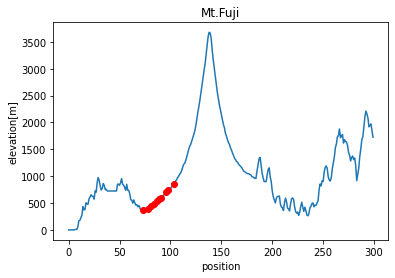

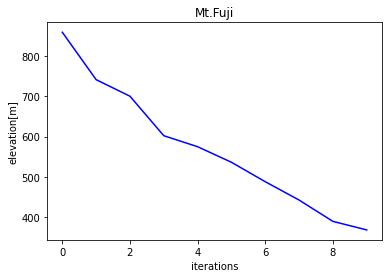

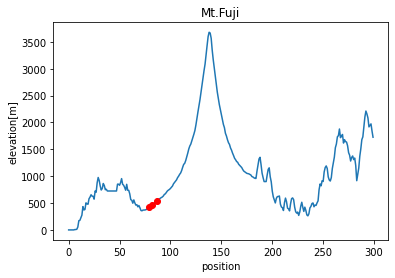

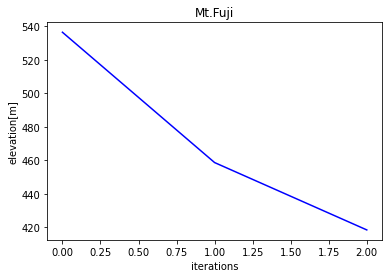

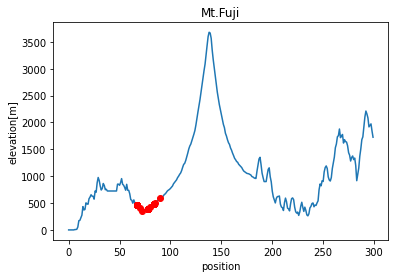

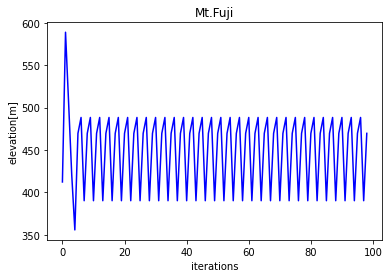

In [9]:
des_points = go_down(136, 0.2)
drawGraph(des_points)

des_points = go_down(136, 0.3)
drawGraph(des_points)

des_points = go_down(136, 0.4)
drawGraph(des_points)